# LSST Camera Footprint Filter Demo

This notebook demonstrates the LSST camera footprint filter for LSST opsim based survey simulations (http://astro-lsst-01.astro.washington.edu:8080/) and the output of the JPL based solar system object survey simulator (https://github.com/dirac-institute/survey_simulator). 

In [1]:
from sorcha.modules import PPFootprintFilter as fp

In [2]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
def getSqlData(database,rows_start,nrows):
    """Import dataset from local SQL database
    
    Parameters:
    -----------
    database   ... path to database
    rows_start ... number of row to start
    rows_max   ... number of rows to select
    
    Returns:
    --------
    observations ... pandas dataframe containing observations from JPL database
    """
    con = sql.connect(database)
    observations = pd.read_sql("""SELECT * FROM observations LIMIT """+str(rows_start)+','+str(nrows), con)
    return observations

## Import LSST Opsim database 
This database contains LSST pointings and environmental information such as seeing.


In [4]:
db_path = "oneline_v2.0.db"

Select the first ten exposures of the LSST survey for testing purposes.

In [5]:
LSSTdf = getSqlData(db_path,0,1)

In [6]:
LSSTdf

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz
0,402942,273.428988,-24.927018,60945.035513,60945.046343,30.0,r,182.732823,2,1.167313,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656


## Grab simulated observations

In [7]:
dfobs = pd.read_csv("footprintFilterValidationObservations.csv", delim_whitespace=True)

In [8]:
dfobs

,ObjID,FieldID,FieldMJD_TAI,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),Ast-Sun(J2000x)(km),...,Ast-Sun(J2000vz)(km/s),Obs-Sun(J2000x)(km),Obs-Sun(J2000y)(km),Obs-Sun(J2000z)(km),Obs-Sun(J2000vx)(km/s),Obs-Sun(J2000vy)(km/s),Obs-Sun(J2000vz)(km/s),Sun-Ast-Obs(deg),V,V(H=0)
0,S0000w6ca,402942.0,60945.035513,344266000.0,9.645862,273.950475,0.145419,-25.409570,-0.034414,171050400.0,...,5.477871,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,23.579048,28.916485,4.915485
1,S0000wkZa,402942.0,60945.035513,93728970.0,24.810874,273.029493,1.592210,-24.398177,-0.243588,154138100.0,...,-2.670822,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,58.765271,25.451943,1.441943
2,S0000wspa,402942.0,60945.035513,330569600.0,21.915557,274.480023,0.072605,-25.283050,0.093505,172974700.0,...,8.064873,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,24.363095,28.799210,4.784210
3,S0000wUea,402942.0,60945.035513,492613400.0,25.078801,273.646543,0.109090,-25.456436,0.005462,177915900.0,...,1.489699,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,16.976109,30.199404,6.167404
4,S0000xl3a,402942.0,60945.035513,200278800.0,30.796080,271.853254,0.734379,-23.453650,-0.003425,155568800.0,...,-0.605902,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,37.584025,27.273330,3.225330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29051,mpc00K8271,402942.0,60945.035513,360725700.0,20.617454,272.594036,0.244908,-25.480627,0.015066,164365000.0,...,3.899935,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,22.787741,22.312084,5.062084
29052,mpc00K9056,402942.0,60945.035513,261587100.0,16.465273,272.172454,0.412457,-25.517282,0.032230,158575700.0,...,6.222693,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,30.279516,21.032581,4.012581
29053,mpc00K9551,402942.0,60945.035513,298658200.0,16.740250,274.477149,0.288844,-26.376947,0.009252,170513400.0,...,4.841374,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,26.624500,21.221274,4.451274
29054,mpc00K9617,402942.0,60945.035513,371087000.0,21.670828,272.019401,0.241333,-24.188684,0.022293,161555100.0,...,4.423580,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,22.274549,22.124108,5.154108


These observations all lie on a circle of radius 2.1deg.

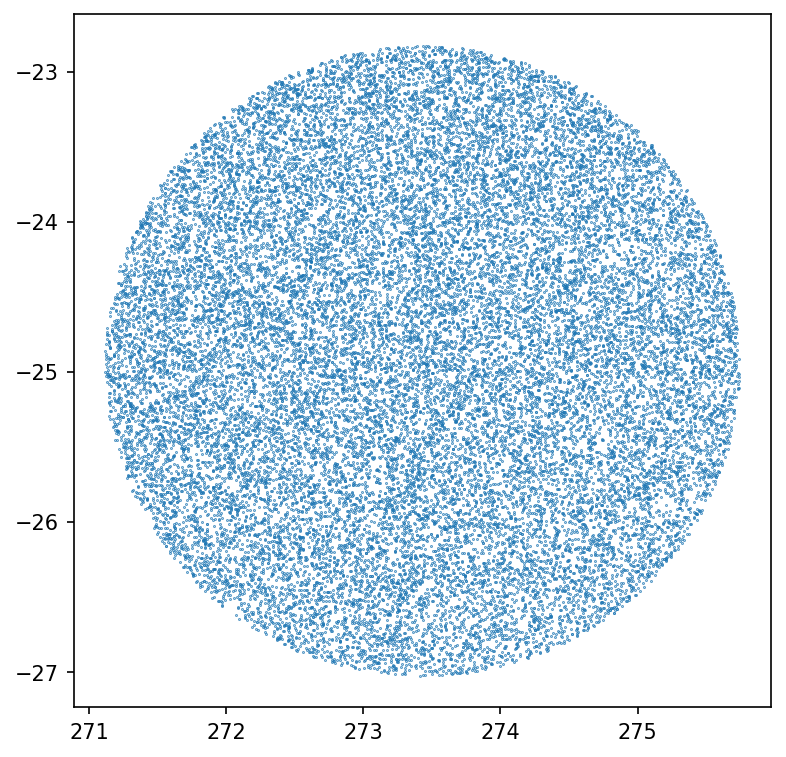

In [9]:
plt.figure(dpi=150,figsize=(6,6))
plt.scatter(dfobs['AstRA(deg)'],dfobs['AstDec(deg)'],s=0.1)
plt.show()

In [10]:
dfobs = pd.merge(dfobs, LSSTdf, left_on="FieldID", right_on="observationId", how="left")

## Test footprint filter

In [11]:
camera = fp.Footprint("detectors_corners.csv")

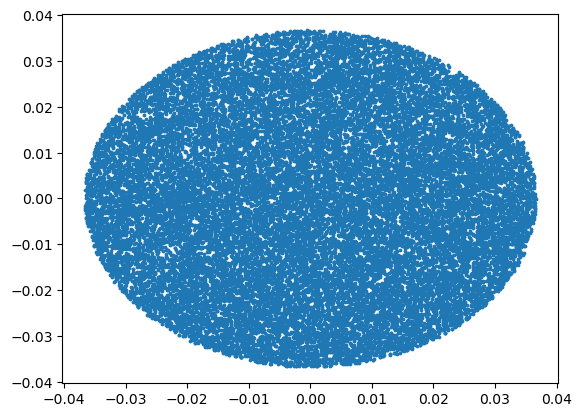

In [12]:
df_new=camera.applyFootprint(dfobs)

In [13]:
dfobs_in_fp = dfobs.iloc[df_new[0]]

In [14]:
dfobs_in_fp

,ObjID,FieldID,FieldMJD_TAI,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),Ast-Sun(J2000x)(km),...,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase,cummTelAz
184,S0000qEoa,402942.0,60945.035513,387445900.0,24.937591,274.368502,0.140563,-23.230652,0.005002,176746300.0,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656
374,S1001Q51a,402942.0,60945.035513,406746600.0,23.471586,274.255988,0.214356,-23.310009,-0.004073,177348800.0,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656
448,S1006IoOa,402942.0,60945.035513,317372700.0,19.818773,274.444716,0.272782,-23.345640,-0.018433,172208800.0,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656
538,S1000Ks7a,402942.0,60945.035513,346006200.0,23.300574,274.429778,0.254463,-23.156810,0.014485,174198300.0,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656
773,S1006rEca,402942.0,60945.035513,393096900.0,20.805666,274.283327,0.201285,-23.226368,0.016283,176607200.0,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27426,mpcK17B32N,402942.0,60945.035513,110491500.0,5.913646,272.495186,0.581329,-26.689091,-0.086678,153924700.0,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656
27821,mpcK12DA8D,402942.0,60945.035513,347987400.0,24.193037,272.577922,0.304269,-26.678877,0.043013,163612400.0,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656
28384,mpcK16A35J,402942.0,60945.035513,384200300.0,22.344931,272.483062,0.224164,-26.507794,-0.027891,164522200.0,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656
28808,mpcK14Wr0K,402942.0,60945.035513,410177600.0,24.292635,272.582601,0.217256,-26.649959,0.054629,166145800.0,...,255.879834,249.525893,3.202872,-0.026538,237.159818,-25.033311,32.775376,89.284813,31.535417,-60.379656


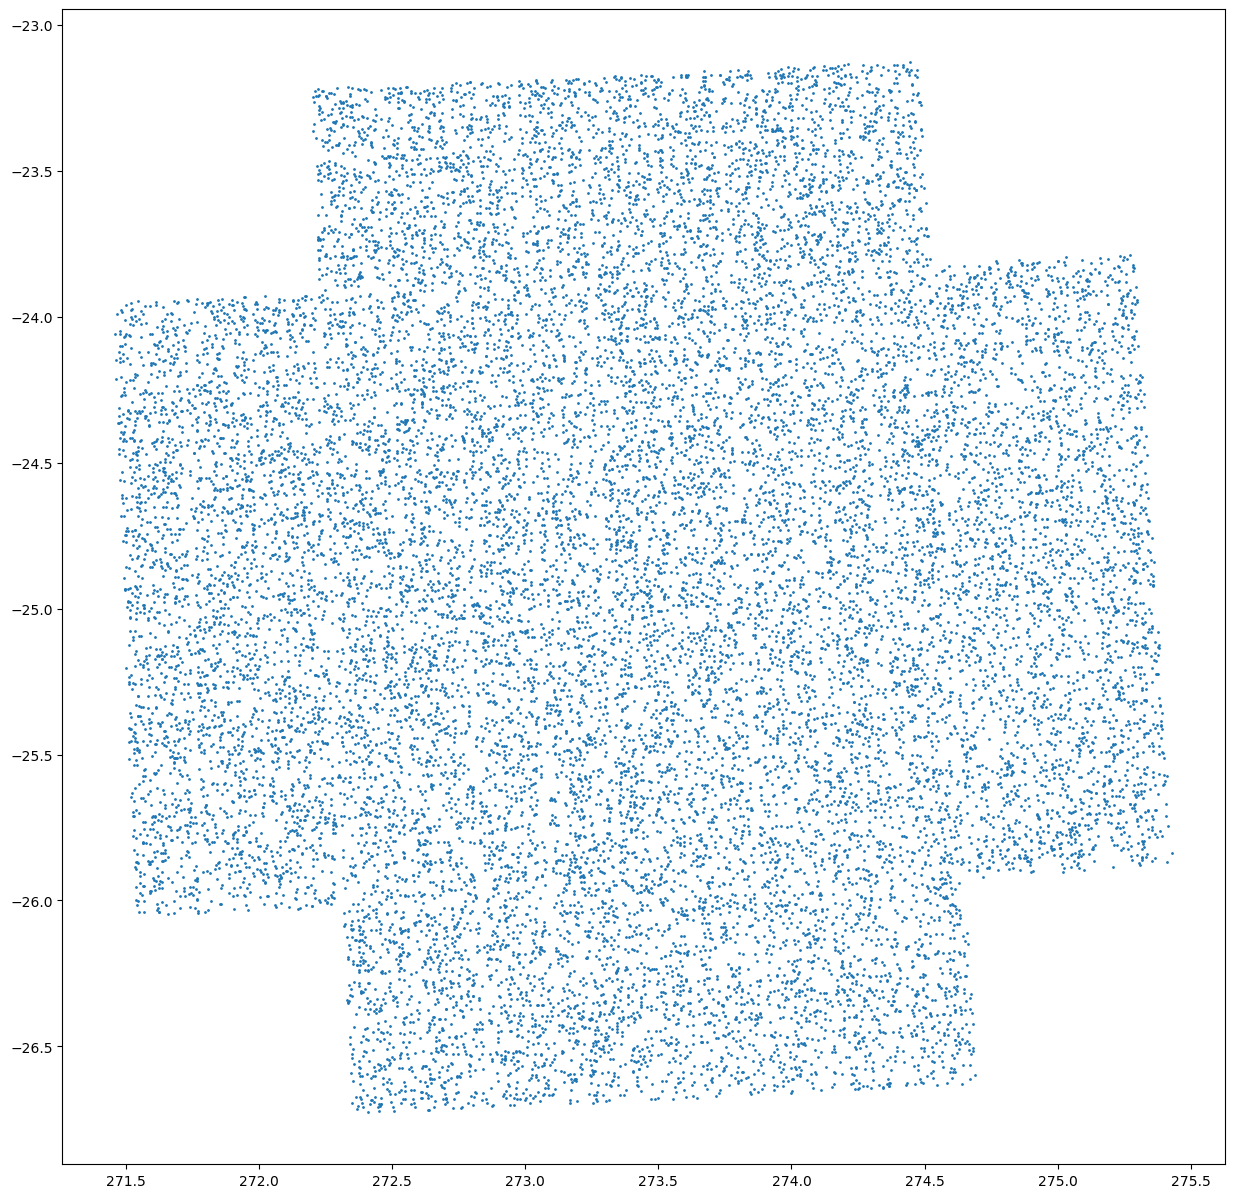

In [15]:
plt.figure(figsize=(15, 15))
plt.scatter(dfobs_in_fp['AstRA(deg)'],dfobs_in_fp['AstDec(deg)'],s=1.)
plt.show()